In [1]:
options(repr.plot.width=10, repr.plot.height=6)

In [2]:
library(tidyverse)
library(gridExtra)
library(xlsx)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [3]:
usMarkets <- read.csv('../data/processed/us-market-commodity-exchange-rates.csv',
                     stringsAsFactors = FALSE) %>% 
    mutate(Date = as.Date(Date))
usCompetitors <- read.csv('../data/processed/us-competitor-commodity-exchange-rates.csv',
                       stringsAsFactors = FALSE) %>% 
    mutate(Date = as.Date(Date))
usSuppliers <- read.csv('../data/processed/us-supplier-commodity-exchange-rates.csv',
                      stringsAsFactors = FALSE) %>% 
    mutate(Date = as.Date(Date))
head(usCompetitors)

Date,Year,Month,CompetitorMerchandiseExportsToTheWorld,CompetitorAgriculturalExportsToTheWorld,XBulk,Corn1,Cotton1,Rice1,Soybeans1,⋯,TreeNuts1,DairyProducts1,PreparedFood4,FreshProcessedFruit1,FreshProcessedVegetables1,JuicesBeverages1,BeefBeefProducts1,PorkPorkProducts1,PoultryMeatProducts1,WineBeer1
<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1970-01-01,1970,1,102.1530,104.2275,102.8518,99.28199,99.49419,102.9397,95.11275,⋯,111.2218,119.6270,108.2415,111.3986,115.5069,112.2411,107.9076,120.8013,110.9502,115.7211
1970-02-01,1970,2,102.3140,104.3866,102.9856,99.36890,99.66949,103.0388,95.22401,⋯,111.4016,119.7621,108.4214,111.5101,115.6706,112.4282,107.9950,120.9784,111.0665,115.8500
1970-03-01,1970,3,102.4200,104.5002,102.9073,99.28054,99.54057,103.0215,95.05862,⋯,111.4313,119.6461,108.4435,111.4398,115.6062,112.4615,107.7723,120.8009,110.8505,115.7271
1970-04-01,1970,4,102.7361,105.2486,103.3269,99.70462,100.07111,103.4693,95.44480,⋯,111.9669,119.8786,108.9289,111.9000,115.9174,112.8830,108.0961,121.0450,111.1692,116.0310
1970-05-01,1970,5,102.8962,105.4149,103.2613,99.55312,99.95488,103.4361,95.42118,⋯,111.9808,119.8447,108.9699,111.7669,115.8504,112.8472,108.0140,121.0433,111.0541,115.9781
1970-06-01,1970,6,103.1043,105.5469,103.5774,100.25540,100.07944,103.6649,95.63544,⋯,112.0613,120.1142,109.1578,112.1360,116.0492,113.0562,108.3104,121.0991,111.2258,116.3350


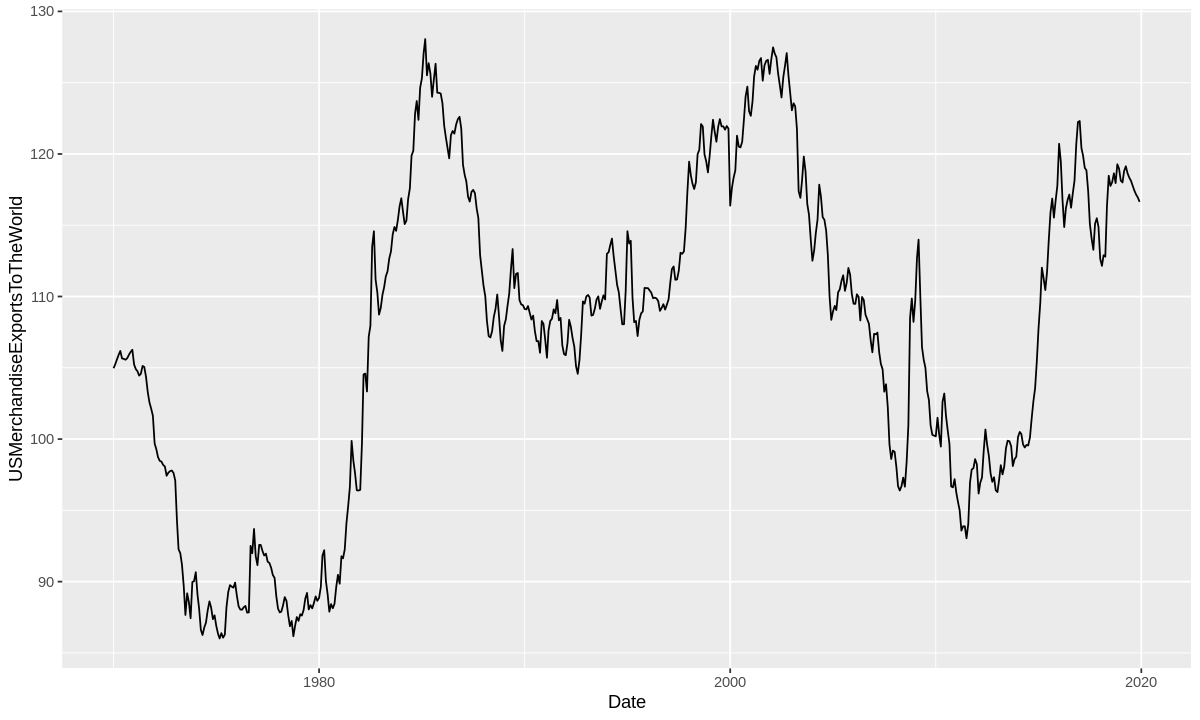

In [4]:
ggplot(usMarkets) +
    geom_line(aes(Date, USMerchandiseExportsToTheWorld))

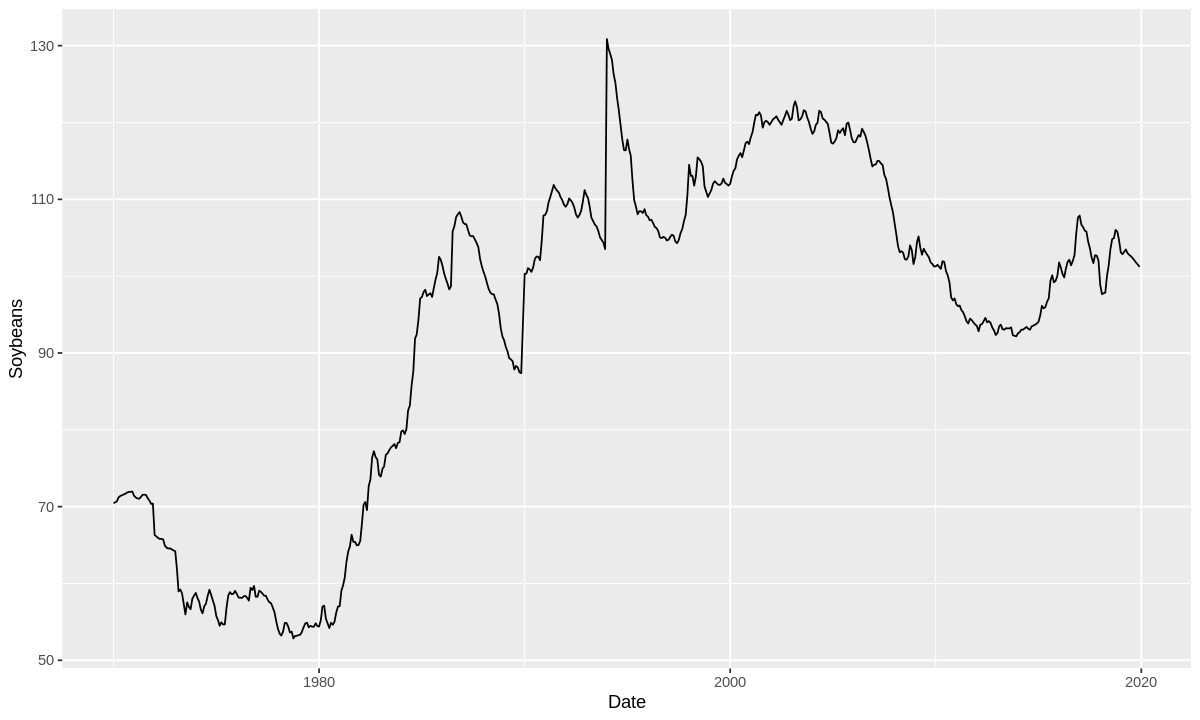

In [5]:
ggplot(usMarkets) +
    geom_line(aes(Date, Soybeans))

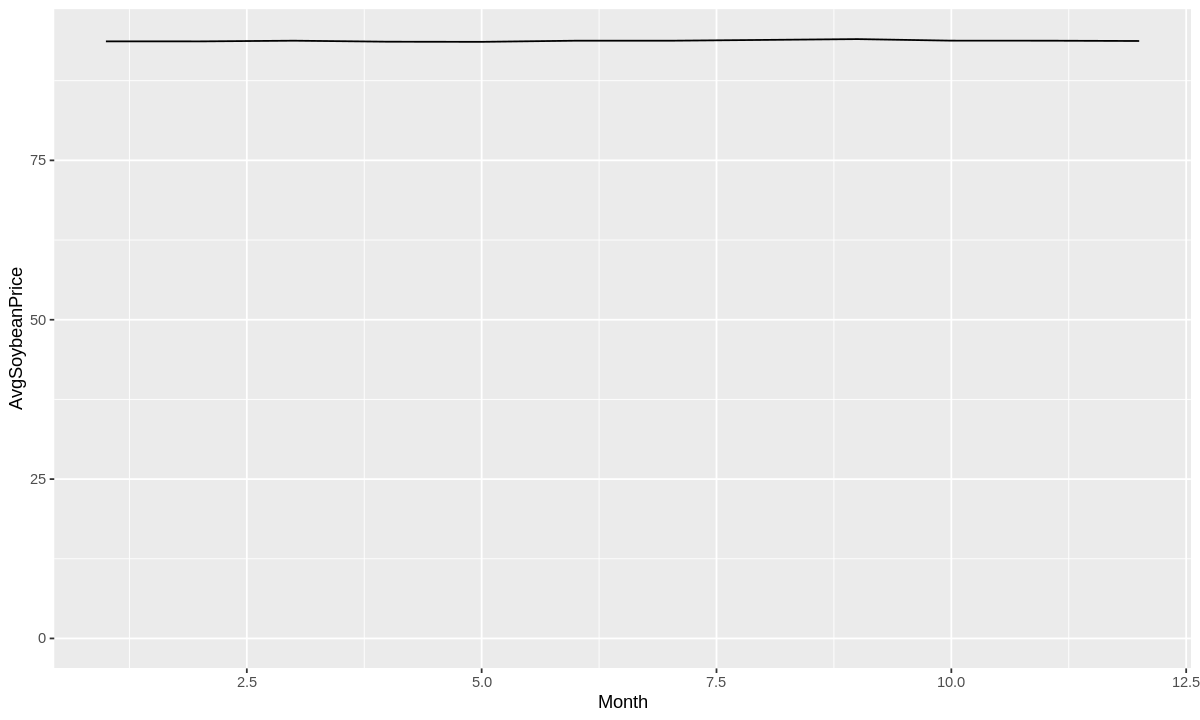

In [6]:
usMarkets %>% 
    group_by(Month) %>% 
    summarise(AvgSoybeanPrice = mean(Soybeans)) %>% 
ggplot() +
    geom_line(aes(Month, AvgSoybeanPrice)) +
    expand_limits(y = 0)

In [7]:
summary(aov(Soybeans~as.factor(Month), data=usMarkets))

                  Df Sum Sq Mean Sq F value Pr(>F)
as.factor(Month)  11      8     0.7   0.001      1
Residuals        588 281353   478.5               

Warning message:
“Removed 1 rows containing missing values (geom_path).”

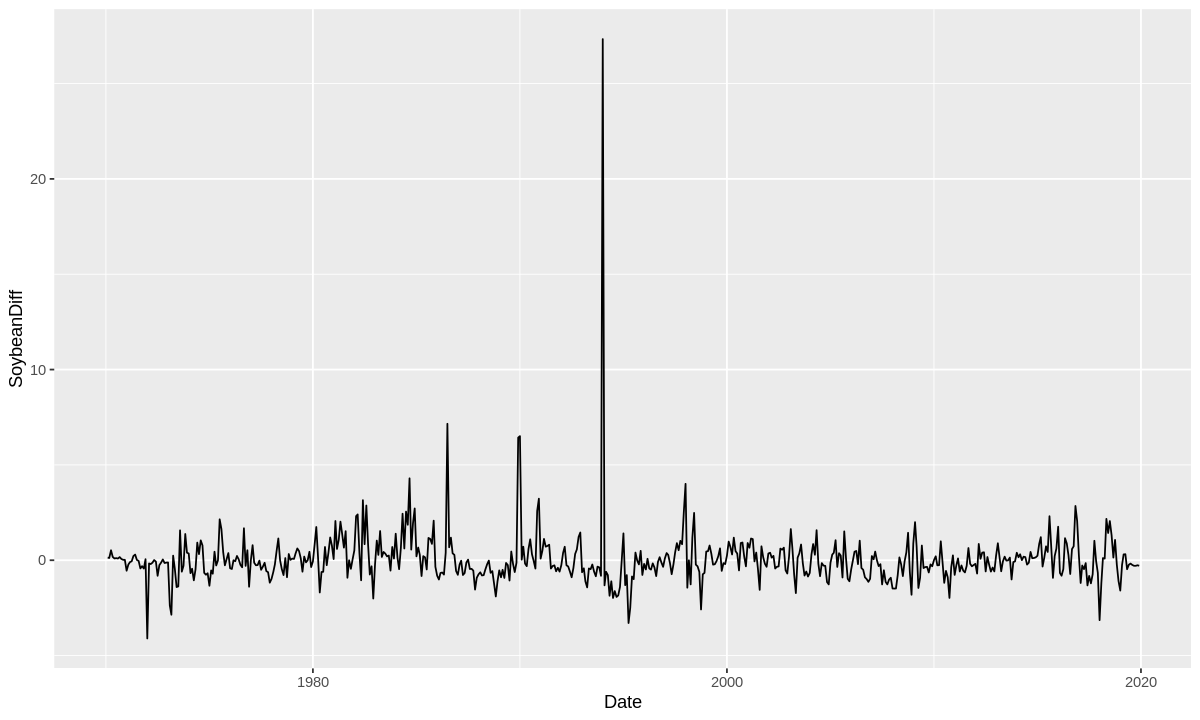

In [8]:
usMarkets %>% 
    mutate(SoybeanDiff = Soybeans - lag(Soybeans)) %>% 
ggplot() +
    geom_line(aes(Date, SoybeanDiff))

In [9]:
withSoybeanDiff = usMarkets %>% 
    mutate(SoybeanDiff = Soybeans - lag(Soybeans))
summary(aov(SoybeanDiff~as.factor(Month), data=withSoybeanDiff))

                  Df Sum Sq Mean Sq F value Pr(>F)
as.factor(Month)  11   22.6   2.055   0.877  0.563
Residuals        587 1375.4   2.343               
1 observation deleted due to missingness

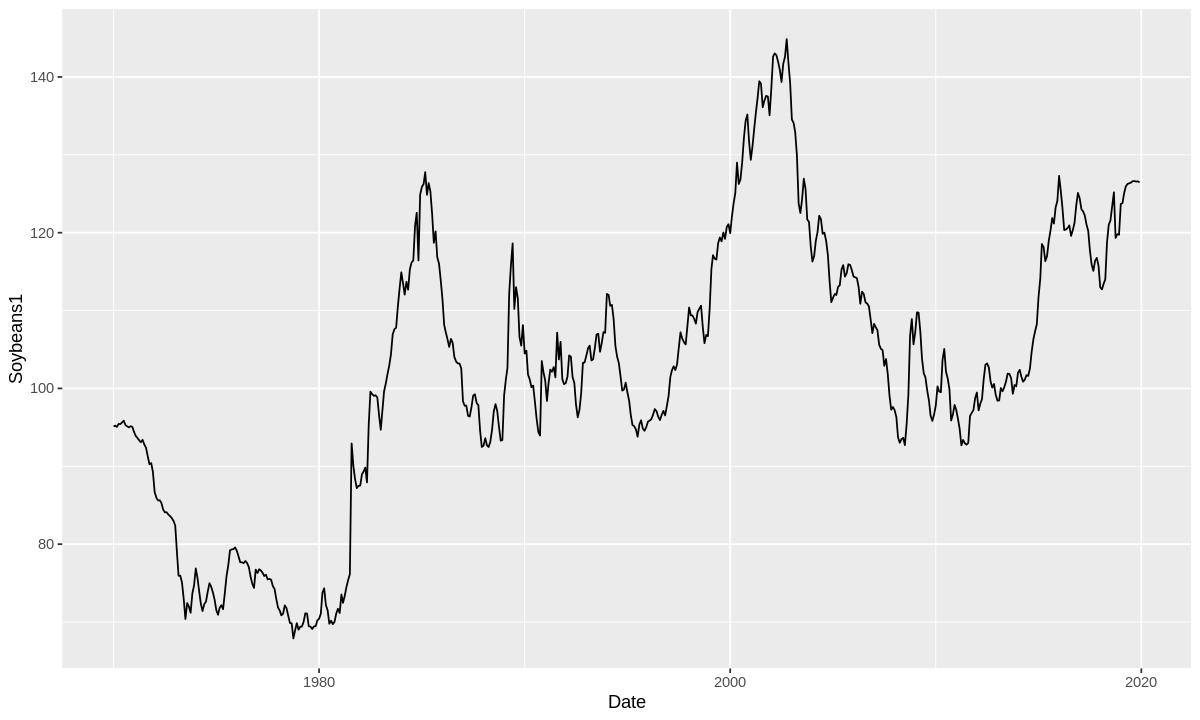

In [10]:
ggplot(usCompetitors) +
    geom_line(aes(Date, Soybeans1))

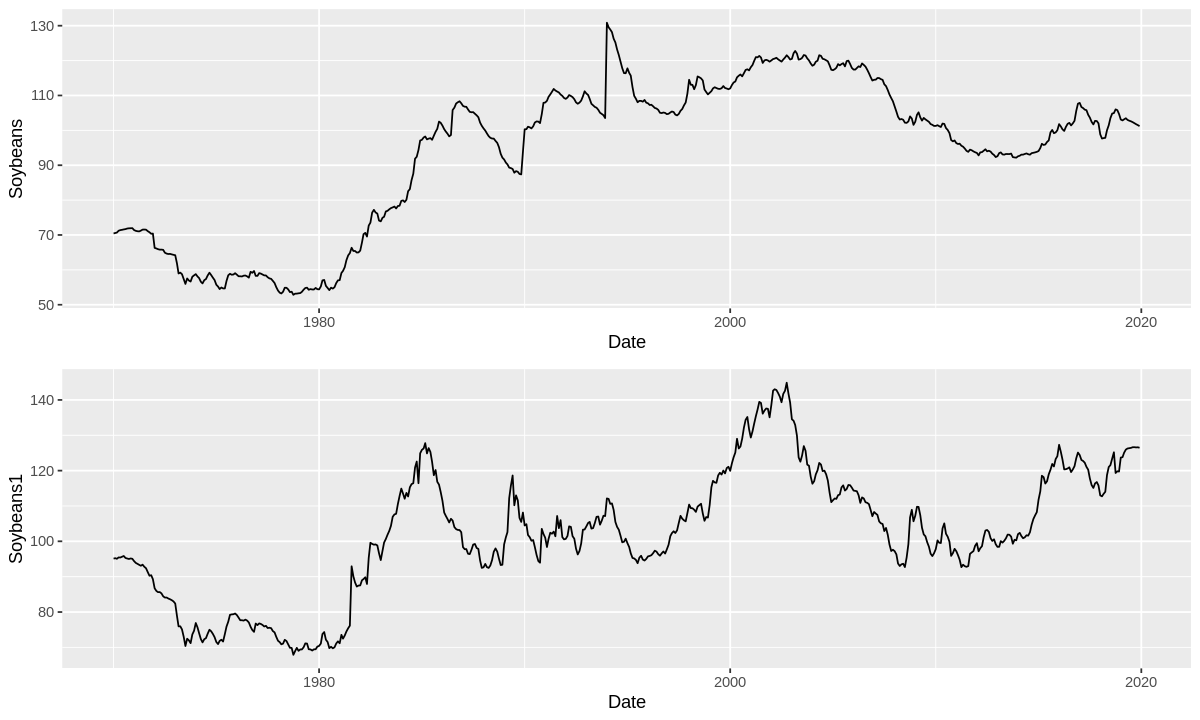

In [11]:
p1 <- ggplot(usMarkets) +
    geom_line(aes(Date, Soybeans))
p2 <- ggplot(usCompetitors) +
    geom_line(aes(Date, Soybeans1))
grid.arrange(p1, p2)

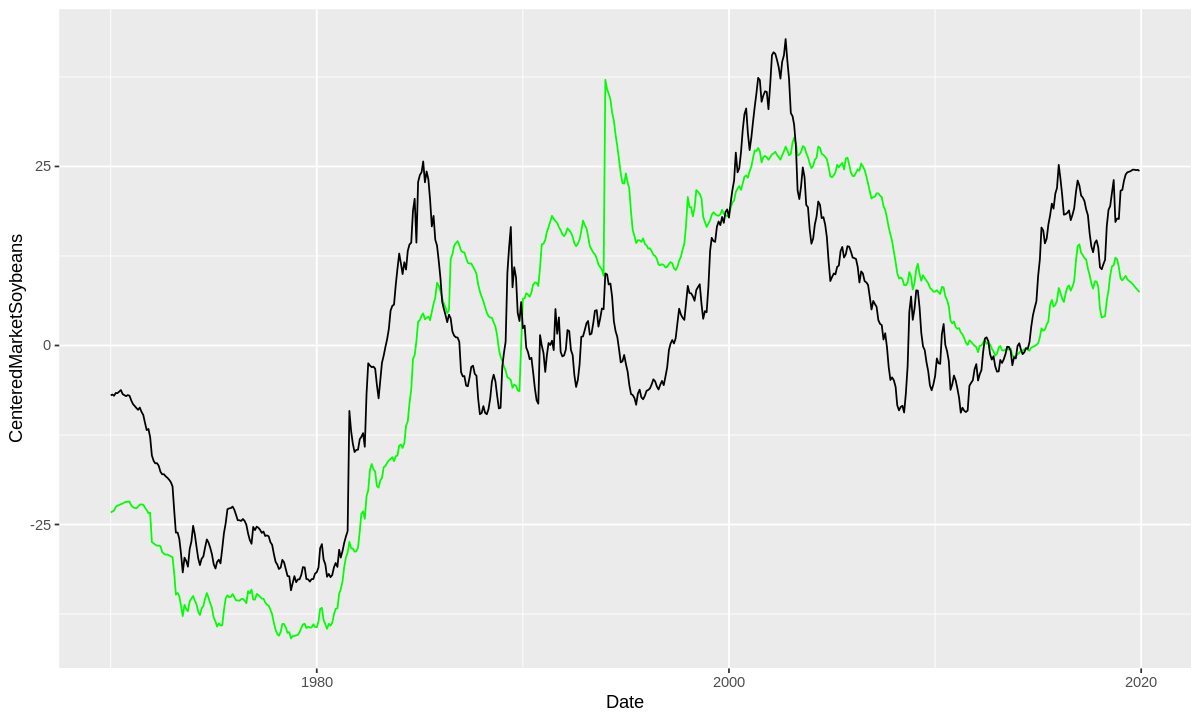

In [12]:
usMarkets %>% 
    left_join(usCompetitors, 'Date') %>% 
    mutate(CenteredMarketSoybeans = Soybeans - mean(Soybeans),
           CenteredCompetitorSoybeans = Soybeans1 - mean(Soybeans1)) %>% 
ggplot() +
    geom_line(aes(Date, CenteredMarketSoybeans), color='green') +
    geom_line(aes(Date, CenteredCompetitorSoybeans))